In [1]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install  kneed

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import os
os.chdir(os.path.expanduser("/home/creal/Desktop/REPOS/data_analytics/development"))

In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [11]:
df = pd.read_parquet('parquet/eventos_transformados.parquet.gzip')  
df["id"] = df.index
df.head()

,timestamp,visitorid,event,itemid,transactionid,fechahora,nombre,apellido,nacimiento,genero,...,correo,telefono,categoria_id,nombre_producto,marca_id,volumen,precio,marca,categoria,id
0,1433221078505,158090,addtocart,10572,NaN,2015-06-02 04:57:58.505,Craig,Sullivan,2/4/61,Male,...,csullivan2d@wsj.com,351-(640)148-2850,1.0,Buchanan's Red Seal,1.0,750,126.75,Diageo Americas,SCOTCH WHISKIES,0
1,1433222147345,1076270,view,262799,NaN,2015-06-02 05:15:47.345,Roger,Franklin,5/10/76,Male,...,rfranklin1m@webeden.co.uk,46-(531)558-4009,1.0,Johnnie Walker Gold Label Reserve,1.0,750,67.49,Diageo Americas,SCOTCH WHISKIES,1
2,1433224644638,361387,view,43485,NaN,2015-06-02 05:57:24.638,Stephen,Duncan,12/16/48,Male,...,sduncan3j@free.fr,86-(321)524-9060,4.0,Tanqueray Rangpur Gin,1.0,750,19.13,Diageo Americas,IMPORTED DRY GINS,2
3,1433221740333,712443,view,346655,NaN,2015-06-02 05:09:00.333,Nevile,Mourant,10/28/98,Male,...,nmourantoj@cnn.com,631-907-1374,11.0,Malt Scotch Sampler,1.0,603,52.50,Diageo Americas,SINGLE MALT SCOTCH,3
4,1433221941632,599528,addtocart,356475,NaN,2015-06-02 05:12:21.632,Samuel,Ward,4/6/89,Male,...,sward0@tamu.edu,86-(786)608-5061,9.0,Crown Royal Honey,1.0,750,22.49,Diageo Americas,CANADIAN WHISKIES,4


In [15]:
df_filtered = df[['id',"categoria"]]
df2 = pd.crosstab(df_filtered['id'], df_filtered['categoria'])
df2.head()

categoria,100 PROOF VODKA,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN COCKTAILS,AMERICAN DRY GINS,AMERICAN GRAPE BRANDIES,AMERICAN RUMS,AMERICAN SLOE GINS,ANISETTE,...,TENNESSEE WHISKIES,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)

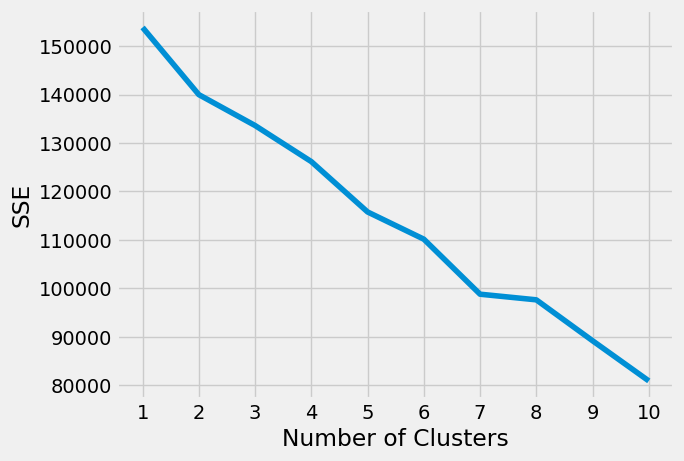

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

7

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [ ]:
kmeans_silhouette


dbscan_silhouette